In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, r2_score
import matplotlib.pyplot as plt

In [ ]:
def dropoutlier(df,dfcol):
    sorted(dfcol)
    q1 = np.percentile(dfcol,25)
    q3 = np.percentile(dfcol,75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr) 
    upper = q3 + (1.5 * iqr)
    indexoutlier = df[(dfcol < lower) | (dfcol > upper)].index
    return df.drop(indexoutlier,inplace = True)

In [ ]:
df = pd.read_csv('./heart.csv')

In [ ]:
listt = [i for i in df.columns]
list1 = listt[:round(len(listt)/2)]
list2 = listt[round(len(listt)/2):]

AxesSubplot(0.125,0.125;0.775x0.755)


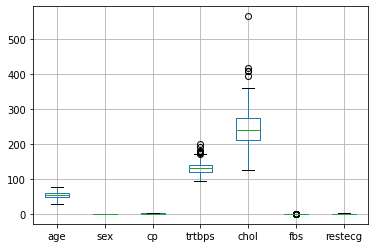

In [ ]:
print(df.boxplot(column=list1))

AxesSubplot(0.125,0.125;0.775x0.755)


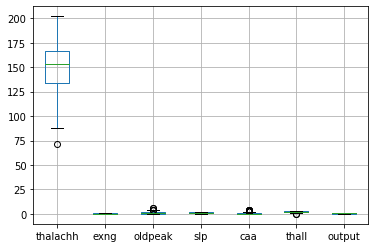

In [ ]:
print(df.boxplot(column=list2))

In [ ]:
dropoutlier(df,df['trtbps'])
dropoutlier(df,df['chol'])
dropoutlier(df,df['thalachh'])
# dropoutlier(df,df['caa'])
# dropoutlier(df,df['oldpeak'])
# dropoutlier(df,df['thall'])

AxesSubplot(0.125,0.125;0.775x0.755)


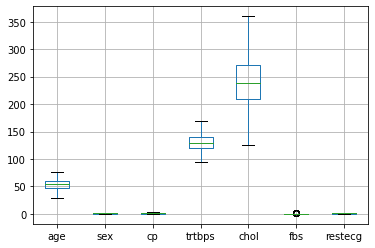

In [ ]:
listt = [i for i in df.columns]
list1 = listt[:round(len(listt)/2)]
list2 = listt[round(len(listt)/2):]
print(df.boxplot(column=list1))

AxesSubplot(0.125,0.125;0.775x0.755)


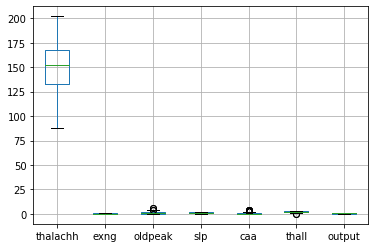

In [ ]:
print(df.boxplot(column=list2))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


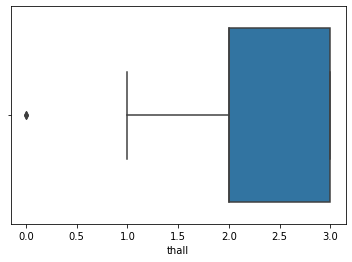

In [ ]:
sns.boxplot(df.thall)

In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.071386,-0.067436,0.278311,0.171578,0.106912,-0.112577,-0.410794,0.092029,0.208542,-0.159846,0.291277,0.057004,-0.228234
sex,-0.071386,1.000000,-0.089162,-0.001140,-0.109624,0.064597,-0.062985,-0.046466,0.186678,0.136369,-0.055367,0.146295,0.231104,-0.313090
cp,-0.067436,-0.089162,1.000000,0.076154,-0.085538,0.087561,0.069639,0.295874,-0.389167,-0.160342,0.120752,-0.171360,-0.181110,0.426658
trtbps,0.278311,-0.001140,0.076154,1.000000,0.092908,0.121848,-0.146286,-0.074843,0.004900,0.162814,-0.092087,0.115997,0.008945,-0.120231
chol,0.171578,-0.109624,-0.085538,0.092908,1.000000,0.014047,-0.116839,-0.028074,0.081591,-0.009814,0.034565,0.069861,0.074629,-0.109798
fbs,0.106912,0.064597,0.087561,0.121848,0.014047,1.000000,-0.082142,-0.019601,0.004785,-0.005768,-0.057886,0.135886,-0.064576,-0.021873
restecg,-0.112577,-0.062985,0.069639,-0.146286,-0.116839,-0.082142,1.000000,0.077269,-0.098556,-0.045818,0.085000,-0.055994,0.014305,0.154995
thalachh,-0.410794,-0.046466,0.295874,-0.074843,-0.028074,-0.019601,0.077269,1.000000,-0.395863,-0.350694,0.386537,-0.238897,-0.121096,0.431206
exng,0.092029,0.186678,-0.389167,0.004900,0.081591,0.004785,-0.098556,-0.395863,1.000000,0.302253,-0.255747,0.115967,0.212837,-0.431165
oldpeak,0.208542,0.136369,-0.160342,0.162814,-0.009814,-0.005768,-0.045818,-0.350694,0.302253,1.000000,-0.560904,0.215227,0.192956,-0.444884


In [ ]:
Correlation = df.corr()
Correlation['output'].abs().sort_values(ascending = False)

output      1.000000
oldpeak     0.444884
thalachh    0.431206
exng        0.431165
cp          0.426658
caa         0.388963
thall       0.347019
slp         0.345785
sex         0.313090
age         0.228234
restecg     0.154995
trtbps      0.120231
chol        0.109798
fbs         0.021873
Name: output, dtype: float64

In [ ]:
listfeature = ['oldpeak','thalachh','cp','caa','slp','thall','slp','sex']

In [ ]:
label = df['output']
features = df[listfeature]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.3, random_state = 42)

In [ ]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression

## Manual

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
def loss(y, y_hat): #MSE
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [ ]:
def gradients(X, y, y_hat):
    m = X.shape[0] #Jumlah Row
    dw = (1/m)*np.dot(X.T, (y_hat - y)) #gradient Weight 
    db = (1/m)*np.sum((y_hat - y)) #Gradient Bias
    return dw, db

In [ ]:
def train(X, y, bs, epochs, lr):
    m, n = X.shape
    w = np.zeros((n,1))
    b = 0

    y = y.reshape(m,1)
    losses = []
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            y_hat = sigmoid(np.dot(xb, w) + b)
            dw, db = gradients(xb, yb, y_hat)
            w -= lr*dw
            b -= lr*db
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    return w, b, losses

In [ ]:
def predict(X):
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [ ]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [ ]:
x_train.shape

(201, 8)

In [ ]:
# Training 
w, b, l = train(x_train, np.array(y_train), bs=30, epochs=10000, lr=0.3)
pred_logistic_manual = predict(x_test)
y_test_s = np.array(y_test).reshape(-1,1)
pred_logistic_manual = np.array(pred_logistic_manual).reshape(-1,1)

In [ ]:
y_test_s = y_test_s.flatten()

In [ ]:
pred_logistic_manual = pred_logistic_manual.flatten()

In [ ]:
cm_logistic_manual = confusion_matrix(y_test_s,pred_logistic_manual)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        36
           1       0.96      0.90      0.93        51

    accuracy                           0.92        87
   macro avg       0.92      0.92      0.92        87
weighted avg       0.92      0.92      0.92        87



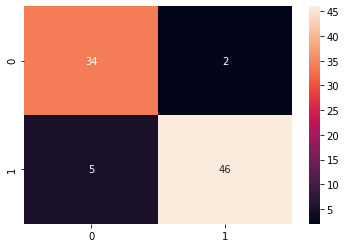

In [ ]:
sns.heatmap(cm_logistic_manual, annot = True)
print(classification_report(y_test_s,pred_logistic_manual))

In [ ]:
accuracy(y_test, pred_logistic_manual)

0.9195402298850575

# SKLEARN

Accuracy logistic Regression :  91.95%
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        36
           1       0.96      0.90      0.93        51

    accuracy                           0.92        87
   macro avg       0.92      0.92      0.92        87
weighted avg       0.92      0.92      0.92        87



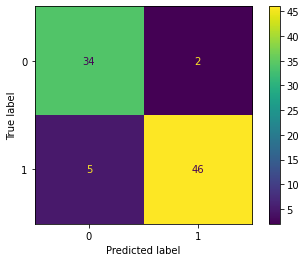

In [ ]:
logistic_regression = LogisticRegression().fit(x_train,y_train)
y_pred_logistic = logistic_regression.predict(x_test)
accuracy_logistic = logistic_regression.score(x_test,y_test)

print(f"Accuracy logistic Regression : {accuracy_logistic*100: .2f}%")

cm_logistic = plot_confusion_matrix(logistic_regression,x_test,y_test)

print(classification_report(y_test,y_pred_logistic))

# SVM

Accuracy SVC:  85.06%
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        36
           1       0.93      0.80      0.86        51

    accuracy                           0.85        87
   macro avg       0.85      0.86      0.85        87
weighted avg       0.86      0.85      0.85        87



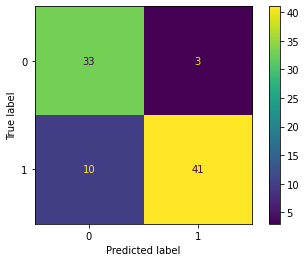

In [ ]:
SVC = SVC().fit(x_train,y_train)
y_pred_svc = SVC.predict(x_test)
accuracy_svc = SVC.score(x_test,y_test)

print(f"Accuracy SVC: {accuracy_svc*100: .2f}%")

cm_SVC = plot_confusion_matrix(SVC,x_test,y_test)
print(classification_report(y_test,y_pred_svc))

# K-Nearest Neighbor

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

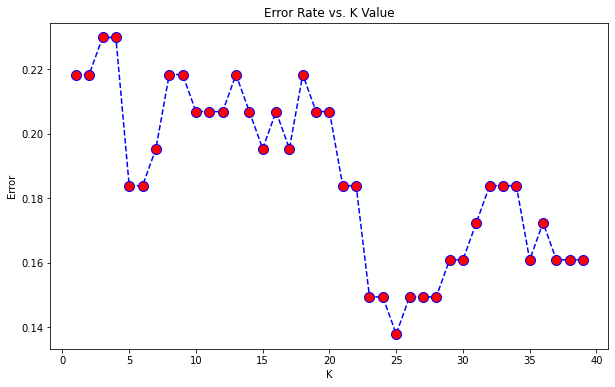

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

Accuracy KNN:  86.21%
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        36
           1       0.90      0.86      0.88        51

    accuracy                           0.86        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.86      0.86      0.86        87



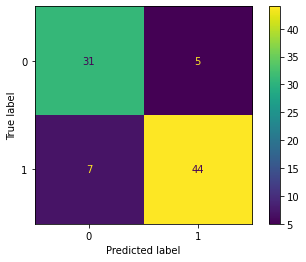

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 25).fit(x_train, y_train)
y_pred_KNN = KNN.predict(x_test)
accuracy_KNN = KNN.score(x_test, y_test)
print(f"Accuracy KNN: {accuracy_KNN*100: .2f}%")

cm_KNN = plot_confusion_matrix(KNN,x_test,y_test)
print(classification_report(y_test,y_pred_KNN))